# Super Store Data Analysis
##### Problem Statement: What insights can we get from this data to make business decisions?

In [1]:
# Import Libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# Import the dataset into dataframe
data_path = "C:\\Users\\Albert\\Desktop\\Dataset\\ML-Data-Analysis-Dev\\US Superstore data.xls"
main_df = pd.read_excel(data_path)
df_copy = main_df

df_copy.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


##### Data cleaning

In [3]:
df_copy.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
# Drop Row ID Column
df_copy.drop('Row ID', axis=1, inplace=True)
df_copy.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Exploratory Analysis in Tableau


In [6]:
# Export cleanned data
#df_copy.to_csv('Store_data_clean.csv')

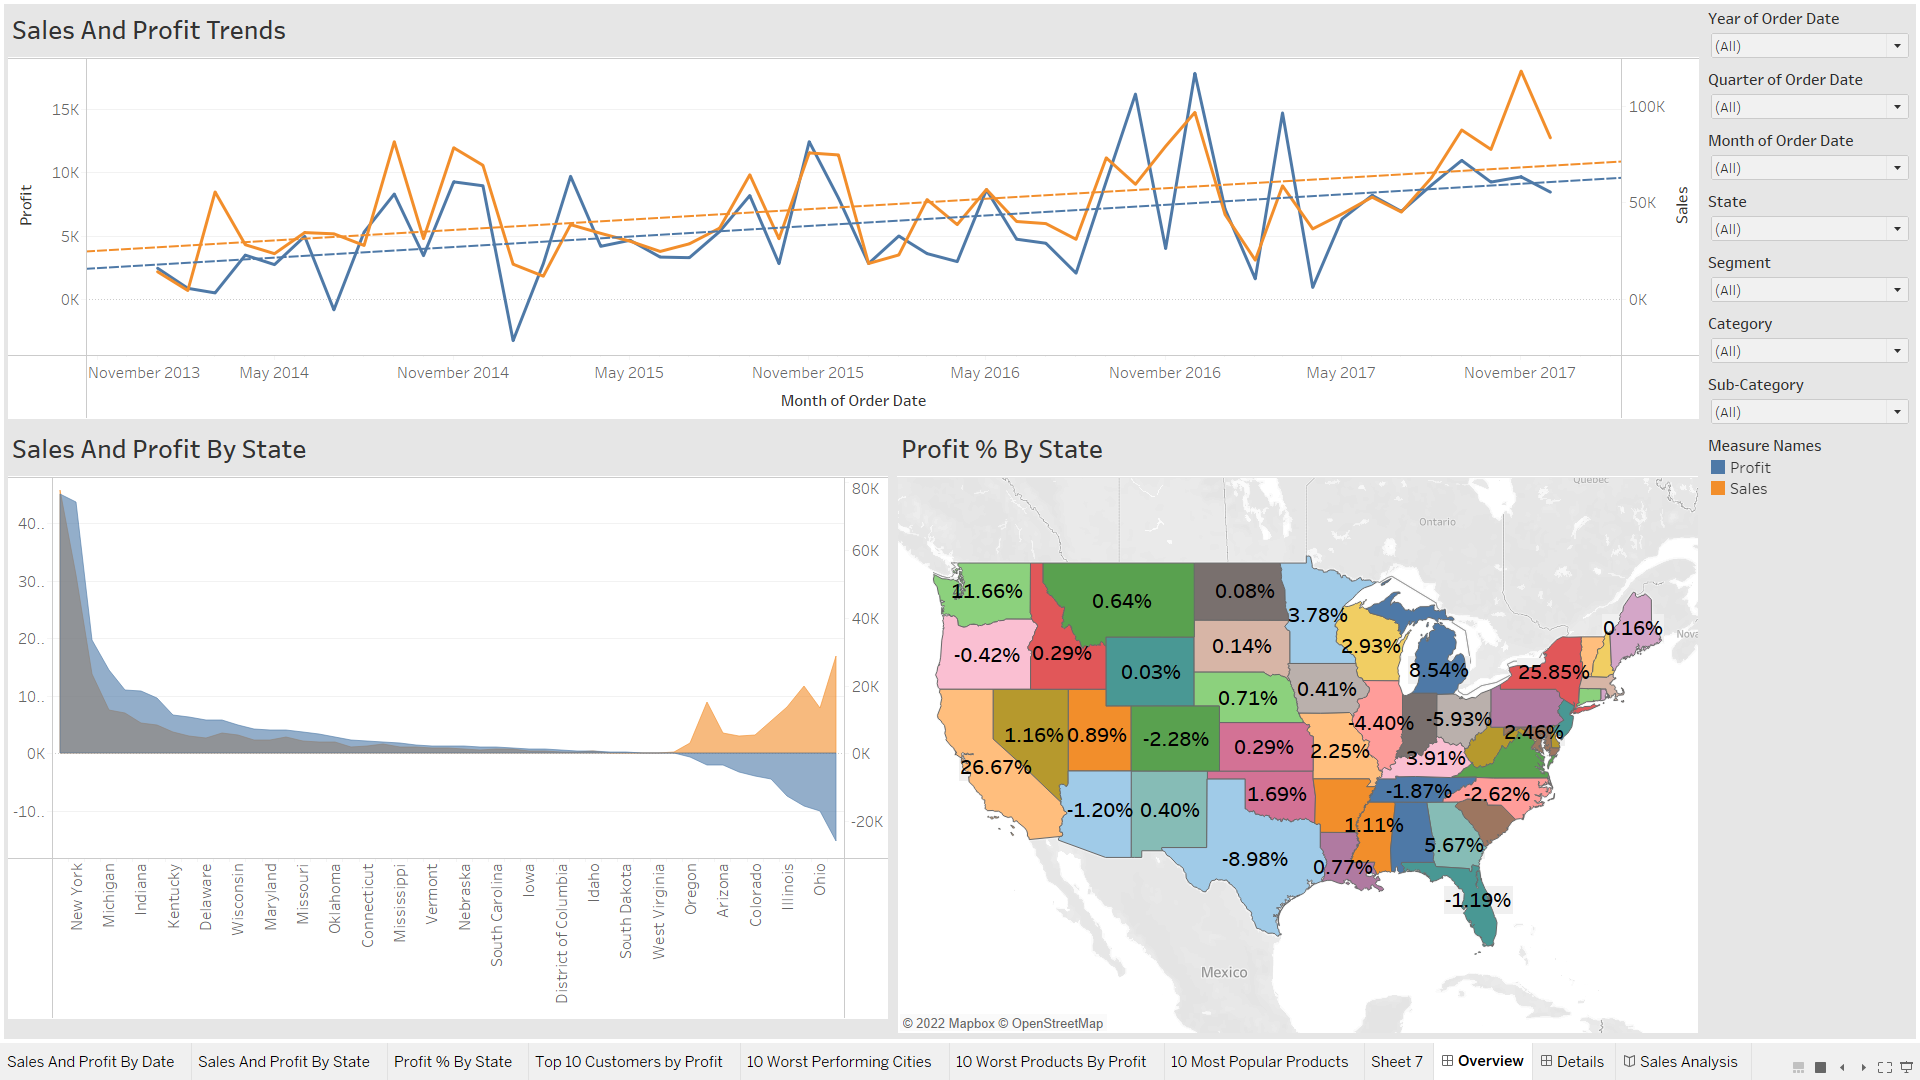

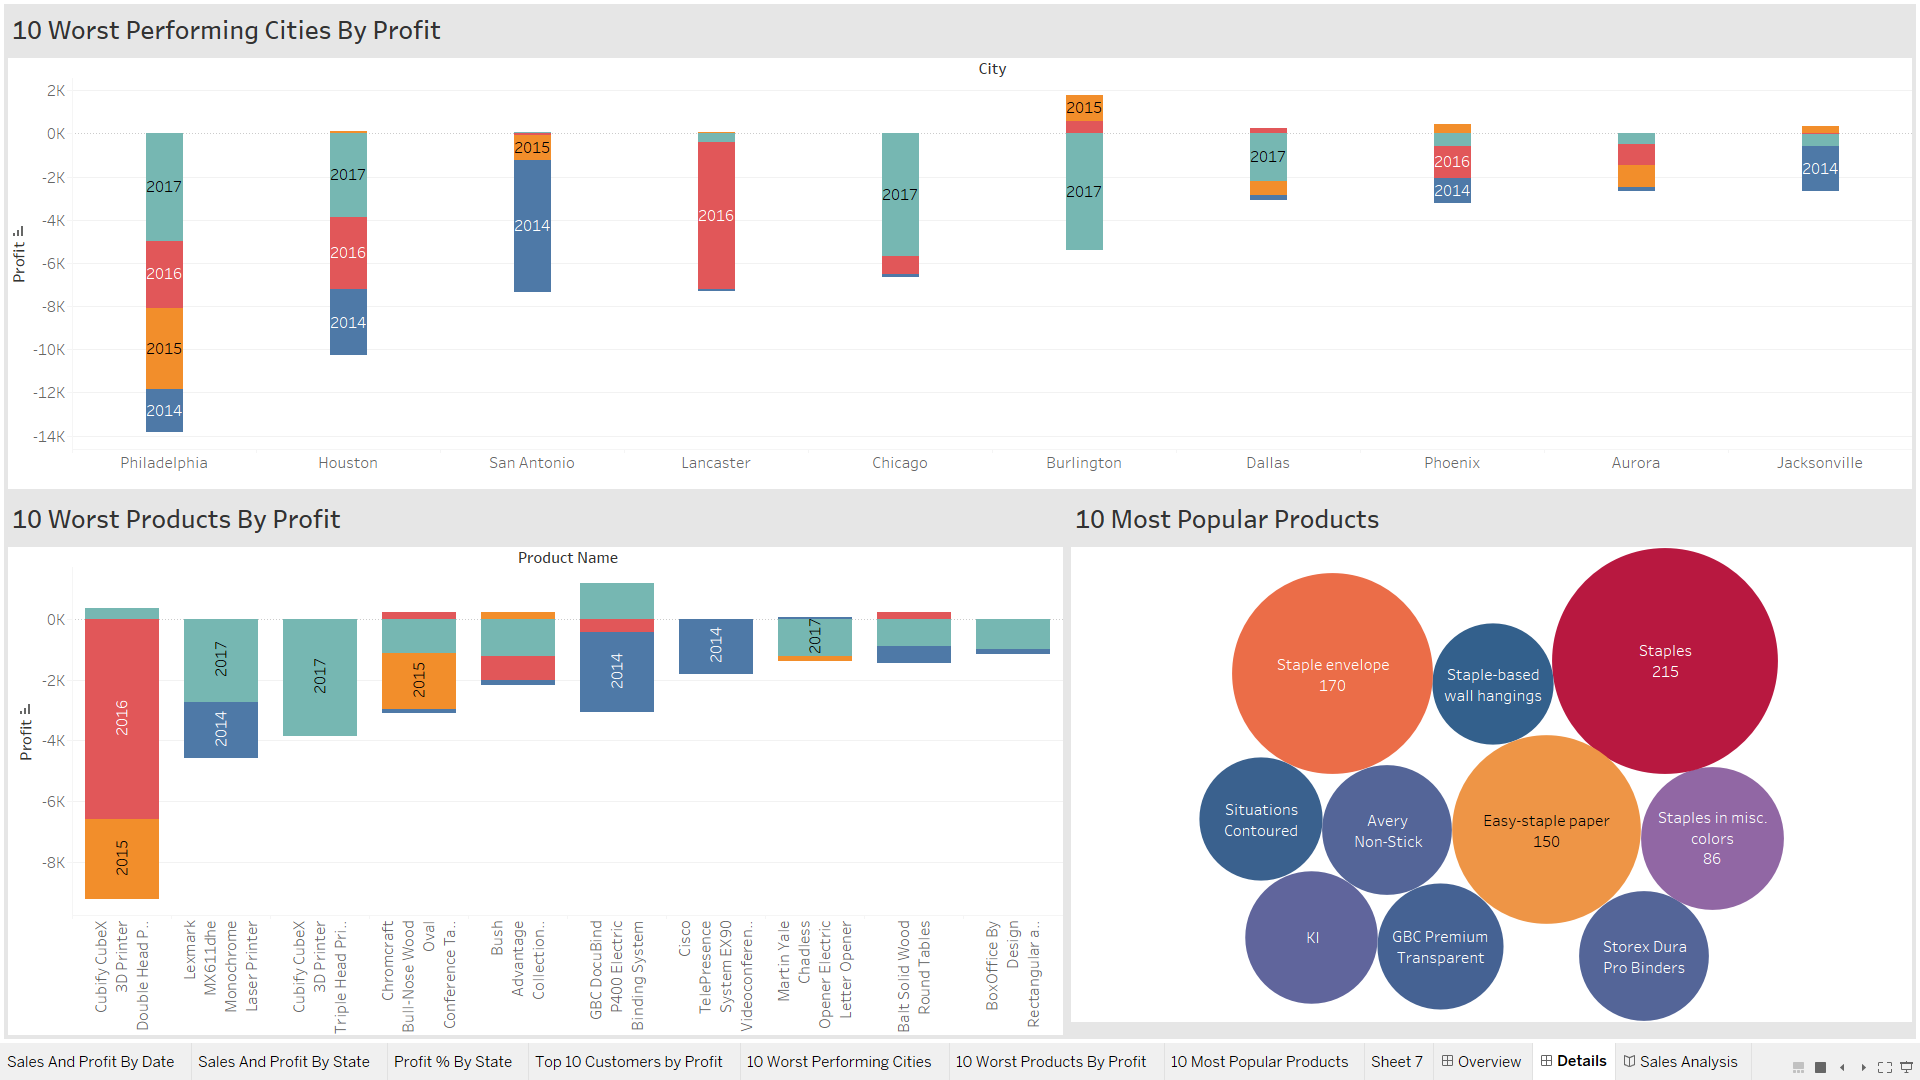

## Cluster Analysis

### Customer Clusters

In [7]:
# Group data be Customer ID
df_customer = df_copy.groupby(['Customer ID']).sum()[['Sales', 'Quantity','Discount', 'Profit']].reset_index()

df_customer.head()

,Customer ID,Sales,Quantity,Discount,Profit
0,AA-10315,5563.560,30,1.00,-362.8825
1,AA-10375,1056.390,41,1.20,277.3824
2,AA-10480,1790.512,36,0.20,435.8274
3,AA-10645,5086.935,64,1.15,857.8033
4,AB-10015,886.156,13,0.40,129.3465


In [8]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  793 non-null    object 
 1   Sales        793 non-null    float64
 2   Quantity     793 non-null    int64  
 3   Discount     793 non-null    float64
 4   Profit       793 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 31.1+ KB


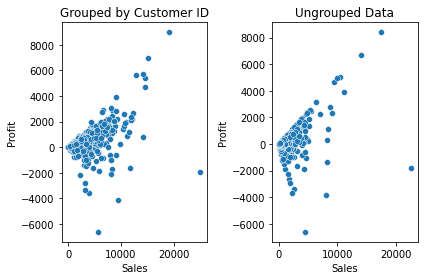

In [9]:
# Plot scatter for sales and profit from grouped and ungrouped data
plt.rcParams['figure.autolayout'] = True
f, axes = plt.subplots(1,2)

sns.scatterplot(x=df_customer['Sales'], y= df_customer['Profit'], ax = axes[0])
axes[0].set_title('Grouped by Customer ID')

sns.scatterplot(x=df_copy['Sales'], y= df_copy['Profit'], ax = axes[1])
axes[1].set_title('Ungrouped Data')
plt.show()

#### Clustering Customers by Sales and Profits Using KMeans Clustering

In [10]:
# Select features
features = df_customer[['Sales', 'Profit']]

# Change feature values to the same scale
features[['Sales', 'Profit']] = pd.DataFrame(StandardScaler().fit_transform(features))
features

C:\Users\Albert\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Sales,Profit
0,1.015112,-0.810161
1,-0.700590,-0.093739
2,-0.421139,0.083553
3,0.833680,0.555721
4,-0.765391,-0.259383
...,...,...
788,-0.198777,0.291008
789,0.973540,1.056814
790,1.455492,1.585699
791,1.952354,-1.559034


In [11]:
# Using the elbow method to find the optimal number of clusters (Within Clusters Sums of Squares)
customer_wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(features)
    customer_wcss.append(kmeans.inertia_)

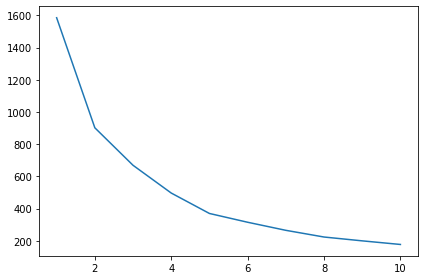

In [12]:
# Pick X value after which the rate of change slows down on the curve
plt.plot(range(1,11), customer_wcss)
plt.show()

In [13]:
# Create model
cust_kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=0)
cust_kmeans.fit(features)
cust_clusters = cust_kmeans.predict(features)
centriods = cust_kmeans.cluster_centers_

In [14]:
# Add cluster labels to features
features['Clusters'] = cust_clusters
features

C:\Users\Albert\AppData\Local\Temp/ipykernel_22072/3617811939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Clusters'] = cust_clusters


,Sales,Profit,Clusters
0,1.015112,-0.810161,0
1,-0.700590,-0.093739,2
2,-0.421139,0.083553,2
3,0.833680,0.555721,0
4,-0.765391,-0.259383,2
...,...,...,...
788,-0.198777,0.291008,0
789,0.973540,1.056814,0
790,1.455492,1.585699,3
791,1.952354,-1.559034,4


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

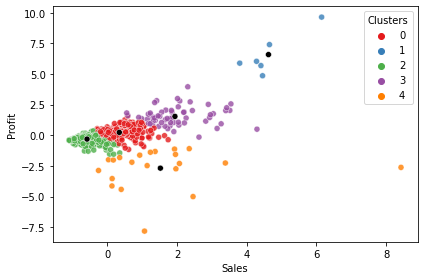

In [15]:
# Plot clusters
sns.scatterplot(x=features['Sales'], y=features['Profit'], hue=features['Clusters'], palette='Set1', alpha=0.8)
sns.scatterplot(x=centriods[:,0], y=centriods[:,1], hue=range(5), palette=['black']*5, legend=False)

#### Scaling data
##### Without putting the profit and sales numbers to the same scale, the clusters will be biased towards the data with larger numbers.
##### Compare the above scaled plot to this unscaled plot below. Notice that the unscaled plot has the clusters running parallel to the vertical axis, influenced heavily by the sales numbers.
##### The scaled plot, however, better captures the relationship between sales and profits.
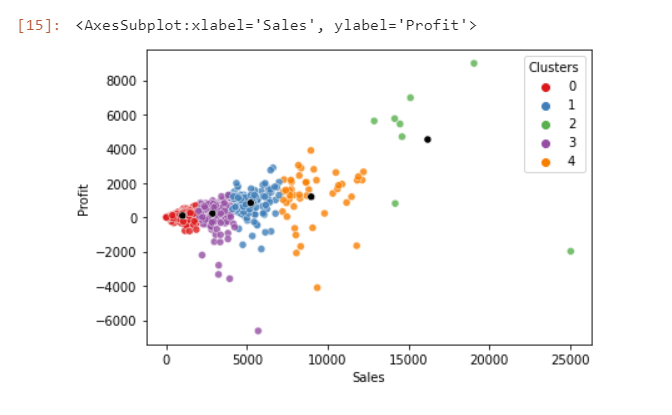

#### Cluster By Zipcode/Postal Code

In [16]:
df_zip = df_copy.groupby(['Postal Code']).sum()[['Sales', 'Quantity','Discount', 'Profit']].reset_index()
df_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Postal Code  631 non-null    int64  
 1   Sales        631 non-null    float64
 2   Quantity     631 non-null    int64  
 3   Discount     631 non-null    float64
 4   Profit       631 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 24.8 KB


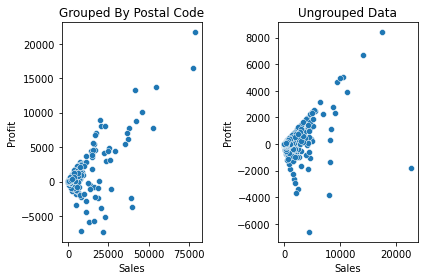

In [17]:
#Plot scatter for sales and profit
f, axes = plt.subplots(1,2)
sns.scatterplot(x=df_zip['Sales'],y=df_zip['Profit'], ax=axes[0])
axes[0].set_title('Grouped By Postal Code')

sns.scatterplot(x=df_copy['Sales'],y=df_copy['Profit'], ax=axes[1])
axes[1].set_title('Ungrouped Data')
plt.show()

In [18]:
# Select features
zip_features = df_zip[['Sales','Profit']]

#Change features values to the same scale. This minimizes a single feature from overly skewing result.
zip_features[['Sales','Profit']] = pd.DataFrame(StandardScaler().fit_transform(zip_features))
zip_features

C:\Users\Albert\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Sales,Profit
0,-0.414877,-0.197169
1,-0.425374,-0.187593
2,-0.426722,-0.193554
3,-0.398239,-0.165202
4,0.306750,0.699273
...,...,...
626,-0.325593,-0.157466
627,-0.437587,-0.207939
628,-0.367050,-0.189621
629,-0.200398,-0.141131


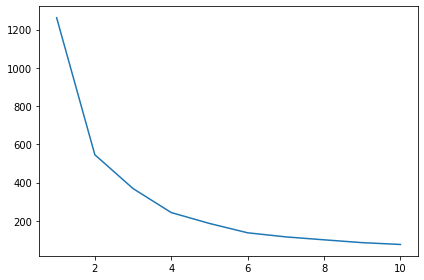

In [19]:
# Using the Elbow method to find the optimal number of clusters (Within Clusters Sums of Squares)
zip_wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(zip_features)
    zip_wcss.append(kmeans.inertia_)

# Pick X value after which the rate of change slows down on the curve. 
plt.plot(range(1,11),zip_wcss)
plt.show()

In [20]:
# Initialize the KMeans model
zip_kmeans = KMeans(n_clusters=6, init='k-means++',random_state=0)
zip_kmeans.fit(zip_features)
zip_clusters = zip_kmeans.predict(zip_features)
zip_centriods = zip_kmeans.cluster_centers_

In [21]:
# Add cluster labels to features
zip_features['Clusters'] = zip_clusters
zip_features

C:\Users\Albert\AppData\Local\Temp/ipykernel_22072/595219376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_features['Clusters'] = zip_clusters


,Sales,Profit,Clusters
0,-0.414877,-0.197169,0
1,-0.425374,-0.187593,0
2,-0.426722,-0.193554,0
3,-0.398239,-0.165202,0
4,0.306750,0.699273,5
...,...,...,...
626,-0.325593,-0.157466,0
627,-0.437587,-0.207939,0
628,-0.367050,-0.189621,0
629,-0.200398,-0.141131,0


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

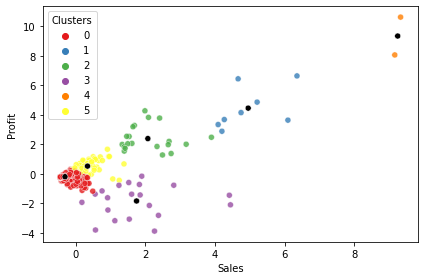

In [22]:
# Plot clusters
sns.scatterplot(x=zip_features['Sales'], y=zip_features['Profit'], hue=zip_features['Clusters'], palette='Set1', alpha=0.8)
sns.scatterplot(x=zip_centriods[:,0], y=zip_centriods[:,1], hue=range(6), palette= ['black']*6, legend=False)

##### Add cluster labels to copy dataframe for export

In [23]:
# Rename Feature columns
features.columns = ['c_Sales', 'c_Profit','c_Clusters']
df_customer = pd.concat([df_customer,features], axis=1)
df_customer

,Customer ID,Sales,Quantity,Discount,Profit,c_Sales,c_Profit,c_Clusters
0,AA-10315,5563.560,30,1.00,-362.8825,1.015112,-0.810161,0
1,AA-10375,1056.390,41,1.20,277.3824,-0.700590,-0.093739,2
2,AA-10480,1790.512,36,0.20,435.8274,-0.421139,0.083553,2
3,AA-10645,5086.935,64,1.15,857.8033,0.833680,0.555721,0
4,AB-10015,886.156,13,0.40,129.3465,-0.765391,-0.259383,2
...,...,...,...,...,...,...,...,...
788,XP-21865,2374.658,100,1.30,621.2300,-0.198777,0.291008,0
789,YC-21895,5454.350,31,0.60,1305.6290,0.973540,1.056814,0
790,YS-21880,6720.444,58,0.60,1778.2923,1.455492,1.585699,3
791,ZC-21910,8025.707,105,7.90,-1032.1490,1.952354,-1.559034,4


In [24]:
#Add to df_copy by Customer ID
df_copy['c_Clusters'] = 0
for id,index in zip(df_copy['Customer ID'], df_copy.index):
    df_copy.loc[index,'c_Clusters'] = df_customer.set_index('Customer ID').loc[id,'c_Clusters']

df_copy.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,c_Clusters
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2


In [25]:
zip_features.columns = ['z_Sales', 'z_Profit', 'z_Clusters']
df_zip = pd.concat([df_zip,zip_features], axis=1)
df_zip


,Postal Code,Sales,Quantity,Discount,Profit,z_Sales,z_Profit,z_Clusters
0,1040,301.960,2,0.0,60.3920,-0.414877,-0.197169,0
1,1453,217.490,20,0.0,79.5016,-0.425374,-0.187593,0
2,1752,206.640,6,0.0,67.6068,-0.426722,-0.193554,0
3,1810,435.850,13,0.0,124.1886,-0.398239,-0.165202,0
4,1841,6109.062,114,0.6,1849.4035,0.306750,0.699273,5
...,...,...,...,...,...,...,...,...
626,98502,1020.448,15,0.4,139.6269,-0.325593,-0.157466,0
627,98632,119.210,10,0.0,38.8983,-0.437587,-0.207939,0
628,98661,686.836,15,0.2,75.4546,-0.367050,-0.189621,0
629,99207,2027.918,36,0.4,172.2261,-0.200398,-0.141131,0


In [26]:
df_copy['z_Clusters'] = 0
for id, index in zip(df_copy['Postal Code'], df_copy.index):
    df_copy.loc[index,'z_Clusters'] = df_zip.set_index('Postal Code').loc[id,'z_Clusters']

df_copy


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,c_Clusters,z_Clusters
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2,2
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2,2
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2,2
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2,0
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,3,0
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,0,0
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,0,0
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,0,0


## Export to CSV for Tableau visualization

In [27]:
#df_copy.to_csv('SuperStoreClustered.csv', index=False)

### ZipCode Clusters
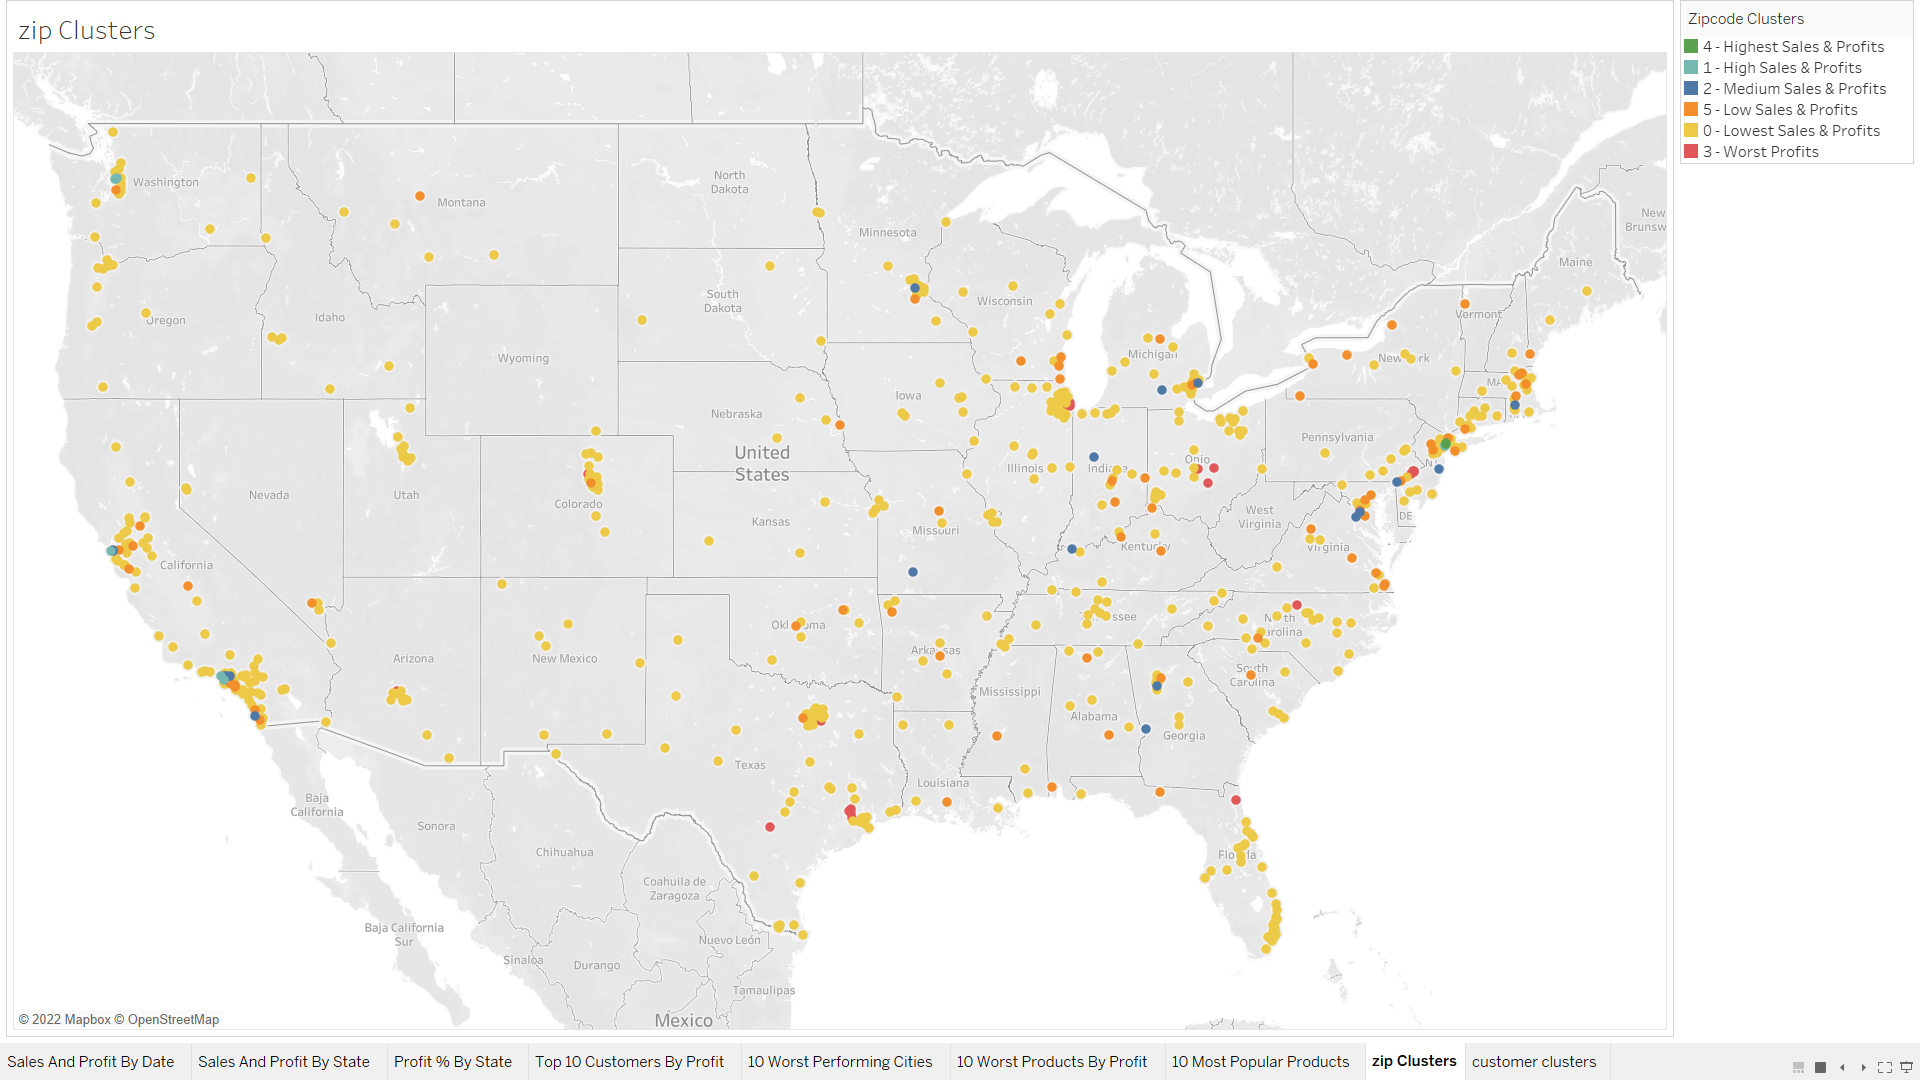

### Customer Clusters
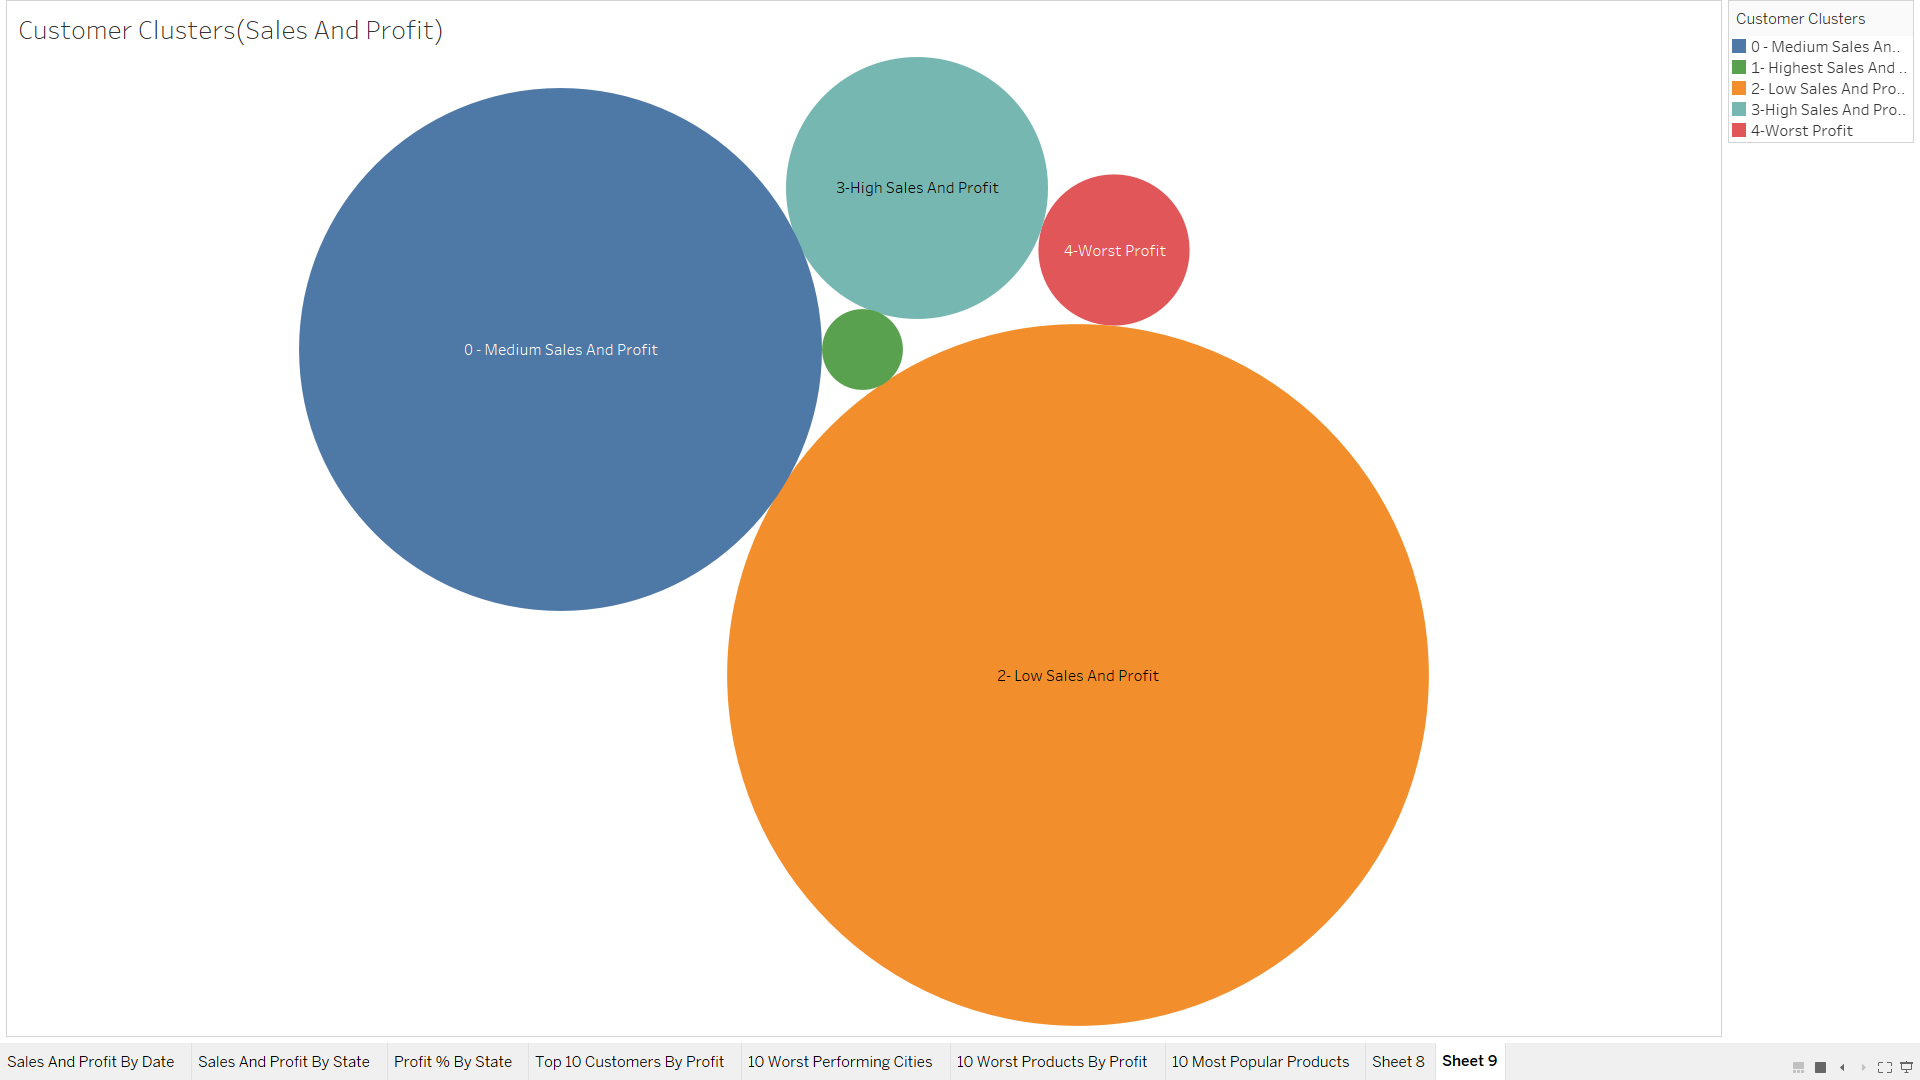

# Observations
##### Overall, sales and profit are trending up. There are some months that saw unsually low profit despite high sales. Example, November 2017. Part of the reason the is higher discount rate for the products. 
##### We can also observe that some states are consistently not profitable. 
# Recommended Actions
- We can drop the worst performing products from available inventory, reducing cost.
- We can use the most popular products to build a recommendation feature based on frequently bought together products.
- We can use the Zip code clusters to send targeted advertisements to drive sales and profit.
- Similarly, we can send targeted communication to the customer clusters.